In [47]:
import pandas as pd
import itertools
from functools import reduce
import networkx as nx

In [40]:
street_data = pd.read_csv('./datasets/november_final.csv')

In [41]:
splitted_endpoints_list = street_data.Intersection.str.split('-').tolist()

In [42]:
merged_endpoints_list = set(reduce(lambda a,b: a+b,splitted_endpoints_list))

In [43]:
indices = [i  for i in range(66)]

merged_endpoints_list_indexed = {list(merged_endpoints_list)[i] : indices[i] for i in range(66)}

In [44]:
merged_endpoints_list_indexed

{'1no(3711604475)(23.8026922,90.3790342)': 0,
 'nationalbanglahighschool(23.80592,90.36266)': 1,
 'shishuhospitalroad(367412089)(23.80371,90.36128)': 2,
 'salimullahhomeoclinic(4331663837)(23.81755,90.37219)': 3,
 'eyehospital(3740064551)(23.8166526,90.3674582)': 4,
 'rabbani2(3734088700)(23.8168069,90.3690480)': 5,
 '369790396(23.79502,90.37870)': 6,
 'bracbank(4322832702)(23.8164626,90.3661185)': 7,
 'parisroadmor(23.8139232,90.3733236)': 8,
 'mirpur6connectingroad(23.81514,90.36330)': 9,
 'wasa(3810920593)(23.8095517,90.3768056)': 10,
 'populardiagnosticcenter(4579879715)(23.8095357,90.3681201)': 11,
 'policestaffarea(367207878)(23.8033,90.3786)': 12,
 '506175481(23.79787,90.38485)': 13,
 'mirpur14(4583693489)(23.7986707,90.3871115)': 14,
 '442797196(23.7963,90.3653)': 15,
 'unicarepharma(3810905497)(23.8103627,90.3772777)': 16,
 'avenue5(23.81023,90.36421)': 17,
 'abashikmor(23.8166417,90.3560896)': 18,
 'mirpur2bs(23.80511,90.36343)': 19,
 'ahsaniamissionroad(367366130)(23.80329,9

In [45]:
final_road_network_list = list()

for i in splitted_endpoints_list:
    final_road_network_list.append((merged_endpoints_list_indexed[i[0]],merged_endpoints_list_indexed[i[1]]))

In [48]:
G = nx.Graph()


In [49]:
G.add_edges_from(final_road_network_list)

In [52]:
G.number_of_nodes()

66

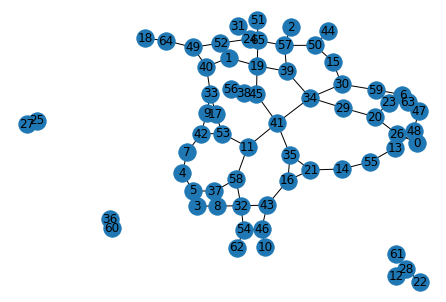

In [85]:
nx.draw(G,with_labels=True,)

In [90]:
final_road_network_df = pd.DataFrame(final_road_network_list,columns = ['src','dest'])

In [91]:
final_road_network_df

,src,dest
0,34,41
1,38,45
2,19,45
3,45,19
4,65,19
...,...,...
149,53,17
150,11,53
151,53,11
152,40,1


In [93]:
final_road_network_df.to_csv('final_road_network.csv',index=False)